In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
import sklearn

In [2]:
def build_model(n_hidden=6, n_neurons=200, learning_rate=3e-3, activationFn = "relu", input_shape=[4]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activationFn, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(keras.layers.Dense(1, activation = activationFn))      # No activation function in output layer 
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mean_squared_error", metrics = "accuracy", optimizer=optimizer)
    return model

In [3]:
pd_BS = pd.read_csv(r'C:\Users\Γιώργος\Desktop\THESIS\PYTHON\DATA\BsTraining.csv')
X = pd_BS.to_numpy()

inputs_BS = np.array(X[:,:4])
outputs_BS = np.array(X[:,4])
pd_BS.head()

,mns,tau,r,sigma,V/K
0,0.592725,0.577882,0.060886,0.612360,0.026292
1,1.581379,0.553633,0.043828,0.622359,0.648810
2,0.635764,0.310517,0.032638,0.951619,0.046535
3,0.785130,0.264107,0.065091,0.154104,0.000047
4,0.536041,0.776493,0.021986,0.187089,0.000003


In [4]:
from sklearn.model_selection import train_test_split
X_train_BS, X_valid_BS, y_train_BS, y_valid_BS = train_test_split(inputs_BS, outputs_BS, test_size = 0.1)

In [5]:
BSmodelnew = build_model(n_hidden=2, n_neurons=250, learning_rate=0.0001, activationFn = "relu", input_shape=[4])
BSmodelnew.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               1250      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 64,251
Trainable params: 64,251
Non-trainable params: 0
_________________________________________________________________


In [6]:
BShistorynew = BSmodelnew.fit(X_train_BS, y_train_BS, epochs = 80, batch_size = 512, validation_data=(X_valid_BS, y_valid_BS))

Epoch 1/80
3516/3516 [==============================] - 23s 6ms/step - loss: 0.0014 - accuracy: 0.0148 - val_loss: 1.5735e-05 - val_accuracy: 0.0147
Epoch 2/80
3516/3516 [==============================] - 24s 7ms/step - loss: 7.3993e-06 - accuracy: 0.0148 - val_loss: 3.3609e-06 - val_accuracy: 0.0147
Epoch 3/80
3516/3516 [==============================] - 26s 7ms/step - loss: 3.2193e-06 - accuracy: 0.0148 - val_loss: 7.2258e-06 - val_accuracy: 0.0147
Epoch 4/80
3516/3516 [==============================] - 22s 6ms/step - loss: 2.2003e-06 - accuracy: 0.0148 - val_loss: 1.2458e-06 - val_accuracy: 0.0147
Epoch 5/80
3516/3516 [==============================] - 21s 6ms/step - loss: 1.7636e-06 - accuracy: 0.0148 - val_loss: 9.9255e-07 - val_accuracy: 0.0147
Epoch 6/80
3516/3516 [==============================] - 23s 7ms/step - loss: 1.5482e-06 - accuracy: 0.0148 - val_loss: 8.2153e-07 - val_accuracy: 0.0147
Epoch 7/80
3516/3516 [==============================] - 25s 7ms/step - loss: 1.4335e-0

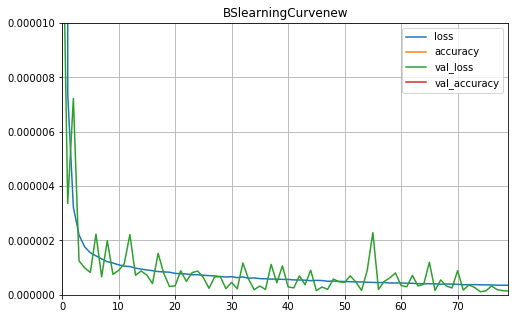

In [7]:
############################################################################################################################
#     fit() method returns a History object containing the training parameters(history.params), the list of epochs it went #
# through(history.epochs), and most importantly a dictionary (history.history), containing the loss and extra metrics it   #
# measured at the end of each epoch on the training set and on the validation set (if any). if  you  use this dictionary   #
# to create a pandas DataFrame and call its plot() method, you get the learning curves                                     #
############################################################################################################################

pd1 = pd.DataFrame(BShistorynew.history)
pd1.to_csv('BShistorynew.csv')
pd1.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.00001) # set the vertical range to [0-1]
plt.title('BSlearningCurvenew')
plt.show()

In [8]:
pd1   = pd.read_csv('BShistory1.csv')
pd2   = pd.read_csv('BShistory2.csv')
pd3   = pd.read_csv('BShistory3.csv')
pdnew = pd.read_csv('BShistorynew.csv') 

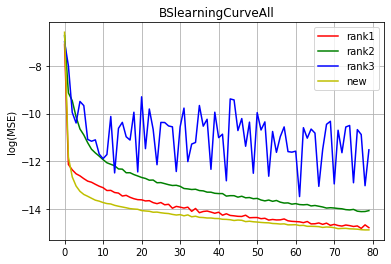

In [9]:
plt.plot(np.log(pd1["loss"]), "r", label = "rank1")
plt.plot(np.log(pd2["loss"]), "g", label = "rank2")
plt.plot(np.log(pd3["loss"]), "b", label = "rank3")
plt.plot(np.log(pdnew["loss"]), "y", label = "new")

plt.grid(True)
plt.ylabel('log(MSE)')
plt.legend(loc = "upper right")
plt.title('BSlearningCurveAll')
plt.show()

In [10]:
BSmodelnew.save("BSmodelnew.h5")

In [11]:
############
#EVALUATION#
############

In [12]:
pd_BS = pd.read_csv(r'C:\Users\Γιώργος\Desktop\THESIS\PYTHON\DATA\BsTest.csv')
X = pd_BS.to_numpy()

inputs_BS = np.array(X[:,:4])
outputs_BS = np.array(X[:,4])
pd_BS.head()

,mns,tau,r,sigma,V/K
0,1.590163,0.888092,0.054842,0.262597,0.639821
1,1.385022,0.959522,0.082605,0.165499,0.461592
2,0.436090,0.415409,0.021017,0.417887,0.000056
3,0.897337,0.386878,0.092519,0.675848,0.123521
4,0.678262,0.947873,0.096074,0.157999,0.001229


In [13]:
BSresults_new = BSmodelnew.evaluate(inputs_BS, outputs_BS)

print("mean square error from rank1 ANN :", BSresults_new[0])


6250/6250 [==============================] - 11s 2ms/step - loss: 1.3663e-07 - accuracy: 0.0148
mean square error from rank1 ANN : 1.366272215364006e-07
